In [10]:
import replicator

In [11]:
import numpy as np

In [12]:
payoff_mat = np.array([[0, -1, 1], [1, 0, -1], [-1, 1, 0]])
labels = ["Rock", "Paper", "Scissors"]

In [13]:
time = np.linspace(0, 6, 100)

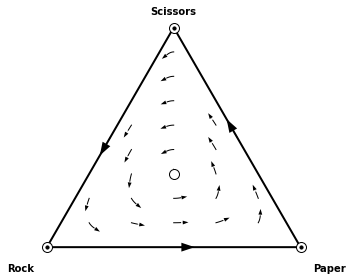

In [14]:
plot, info = replicator.plot2D(
    payoff_mat,
    labels,
    time,
);

In [37]:
import sympy as sym

size = 3

xs = np.array(sym.symbols(f"x_1:{size + 1}"))

solutions = np.array(replicator.fixed_points(xs, payoff_mat))

solutions = np.array([s for s in solutions if xs not in s])

solutions = solutions[~np.any(solutions < 0, axis=1)]
solutions = solutions[~np.any(solutions > 1, axis=1)]
solutions = [[float(s) for s in solution] for solution in solutions]

In [38]:
solutions

[[0.0, 0.0, 1.0],
 [0.0, 1.0, 0.0],
 [0.3333333333333333, 0.3333333333333333, 0.3333333333333333],
 [1.0, 0.0, 0.0]]

In [39]:
J = replicator.jacobian(xs, payoff_mat)

In [40]:
replicator.point_is(J, xs, solutions[2])

'saddle'

In [41]:
eigen_values = J.subs(
    {x: s for x, s in zip(xs, solutions[2])}
).eigenvals()

In [42]:
eigen_values

{0.166666666666667 - 0.440958551844098*I: 1,
 -9.25185853854297e-18 - 1.38720553200621e-65*I: 1,
 0.166666666666667 + 0.440958551844098*I: 1}

In [ ]:

    
    eigen_values = np.array(
        [float(val.subs({sym.I: 0})) for val in list(eigen_values.keys())]
    )
    if 1 in solution:
        mask = np.ones(eigen_values.shape, bool)
        mask[np.where(np.isclose(solution, 1))] = False
        eigen_values = eigen_values[mask]

    if (eigen_values < 0).all():
        return "sink"
    if (eigen_values > 0).all():
        return "source"
    else:
        return "saddle"

In [16]:
payoff_mat = np.array([[1, -1, 0], [1, 0, -1], [-1, 1, 0]])
labels = ["Rock", "Paper", "Scissors"]

IndexError: index 2 is out of bounds for axis 0 with size 2

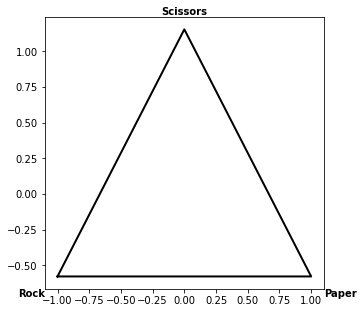

In [17]:
plot, info = replicator.plot2D(
    payoff_mat,
    labels,
    time,
);

In [18]:
info

['There are a total of 4 fixed points.',
 '[0.0, 0.0, 1.0] is a saddle point.',
 '[0.0, 1.0, 0.0] is a saddle point.',
 '[0.3333333333333333, 0.3333333333333333, 0.3333333333333333] is a source point.',
 '[1.0, 0.0, 0.0] is a saddle point.']

In [19]:
import matplotlib.pyplot as plt

IndexError: index 2 is out of bounds for axis 0 with size 2

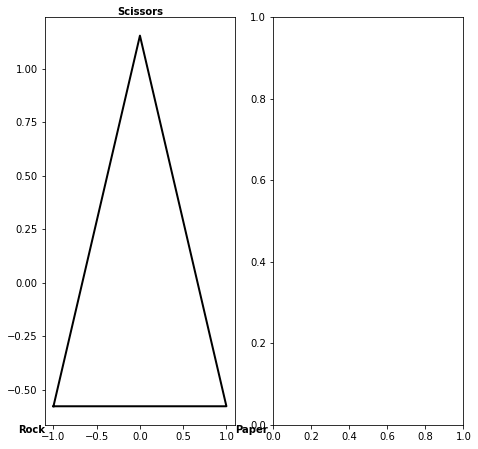

In [20]:
fig, ax = plt.subplots(ncols=2, figsize=(7.5, 7.5))

plot, info = replicator.plot2D(
    payoff_mat,
    labels,
    time,
    ax=ax[0]
);

plot, info = replicator.plot2D(
    payoff_mat,
    labels,
    time,
    ax=ax[1]
);

plt.tight_layout()